# `Desafio de Inferência`

**Por Tamy Tsujimoto**

***Depressão e Hábitos Saudáveis***

O transtorno depressivo representa um grande problema de saúde pública e é apontado como uma das principais causas de doenças e debilitações segundo a Organização Mundial da Saúde (OMS). A depressão resulta de uma interação complexa de fatores sociais, psicológicos e biológicos e, embora o acesso a diagnósticos e tratamentos esteja aumentando, muitos ainda não possuem acesso ao controle adequado dos sintomas depressivos.

Para garantir um estilo de vida saudável, a OMS recomenda a prática regular de exercícios, bem como a adoção de uma dieta saudável rica em alimentos in natura e com reduzido teor de gordura saturada, sal e açucares refinados.

Neste desafio, utilizaremos dados de uma pesquisa realizada anualmente nos Estados Unidos para avaliar (1) qual o perfil de indivíduos (adultos maiores de 18 anos) com sintomas depressivos nos EUA no período de 2005-2006, e (2) se hábitos saudáveis de alimentação e atividade física estão associados a menores índices de depressão nesta população.

***`National Health and Nutrition Examination Survey`***

O National Health and Nutrition Examination Survey (NHANES) é uma pesquisa anual conduzida pelo National Center for Health Statistics (NCHS) do Centro de Controle e Prevenção de Doenças (Centers for Disease Control - CDC) para avaliar a saúde e nutrição de adultos e crianças dos Estados Unidos. Dados coletados incluem questões demográficas, socioeconômicas, dietéticas e relacionadas à saúde, com o componente de exame contendo medidas médicas, odontológicas, fisiológicas e exames laboratoriais.

A pesquisa examina uma amostra de cerca de 5.000 pessoas a cada ano, selecionada à partir de amostragem complexa a fim de selecionar uma amostra representativa da população civil não institucionalizada dos EUA. Sendo assim, as análises utilizando este estudo devem ser realizadas utilizando técnicas e ferramentas que levem em conta a amostragem complexa.

Neste desafio, no entanto, iremos assumir que os dados foram obtidos usando uma amostra aleatória da população de interesse e utilizaremos técnicas e ferramentas de análise usuais para amostras aleatórias para fins didáticos.

***`Patient Health Questionnaire-9 (PHQ-9)`***

O Patient Health Questionnaire-9 (PHQ-9) é um instrumento utilizado para avaliar o grau de depressão em pacientes. O questionário consiste de 9 itens em que os respondentes indicam a frequência (0 = “nenhuma vez”, 1 = “menos de uma semana”, 2 = “uma semana ou mais” e 3 = “quase todos os dias”) de sintomas de depressão nas duas últimas semanas.

O PHQ-9 inclui os seguintes itens para a pergunta “Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos problemas a seguir?” (0 = “nenhuma vez”, 1 = “menos de uma semana”, 2 = “uma semana ou mais” e 3 = “quase todos os dias”):

1 - Pouco interesse ou pouco prazer em fazer as coisas

2 - Se sentiu para baixo, deprimido(a) ou sem perspectiva

3 - Dificuldade para pegar no sono ou permanecer dormindo ou dormiu mais do que o costume

4 - Se sentiu cansado(a) ou com pouca energia

5 - Falta de apetite ou comeu demais

6 - Se sentiu mal consigo mesmo(a) ou achou que é um fracasso ou que decepcionou sua família ou a você mesmo(a)

7 - Dificuldade para se concentrar nas coisas (como ler o jornal ou ver televisão)

8 - Teve lentidão para se movimentar ou falar (a ponto de outras pessoas perceberem), ou ao contrário, esteve tão agitado(a) que você ficava andando de um lado para o outro mais do que costume

9 - Pensou em se ferir de alguma maneira ou que seria melhor estar morto(a)

O escore total é calculado à partir da soma dos itens 1-9 e varia de 0 a 27, em que maiores valores do escore indicam maiores frequências de sintomas de depressão. Aqueles com pontuação maior ou igual a 5 para o escore total de PHQ-9 são considerados como tendo sintomas leves (5-9), moderados (10-14), moderadamente severos (15-19) e severos de depressão (>= 20).

***`Healthy Eating Index - (HEI)`***

O Healthy Eating Index (HEI) é uma medida de qualidade da dieta baseado nas orientações dietéticas do governo federal americano (Dietary Guidelines for Americans). O HEI utiliza diferentes grupos alimentares para o cálculo do escore, variando de 0 a 100, em que maiores valores do escore refletem dietas mais próximas das orientações alimentares em vigor.

O índice é composto por 13 componentes baseados nos grupos alimentares descritos nas recomendações dietéticas. Detalhes dos valores máximos e interpretações estão descritos no quadro abaixo:

(https://storage.googleapis.com/tera-originals/desafio-inferencia/download.png)

***`Physical Activity Guidelines for Americans (PAGA)`***

O Physical Activity Guidelines for Americans (PAG) é emitido pelo Departamento de Saúde e Serviços Humanos (U.S. Department of Health and Human Services (HHS)) e possui recomendações de atividades físicas. Este documento é utilizado em conjunto com as orientações dietéticas para americanos (Dietary Guidelines for Americans) para promover a importância de ser fisicamente ativo e seguir uma dieta saudável.

O PAGA recomenda que adultos se engajem em pelo menos 150 minutos de atividades aeróbicas de intensidade moderada ou 75 minutos de atividades aeróbicas de intensidade vigorosa semanalmente. A partir dos dados coletados do NHANES, é possível calcular o número de minutos de atividades físicas, definido como a total minutos semannais de atividades físicas moderadas + 2*(total minutos de atividades aeróbicas vigorosas).

# `Tratamento dos Dados`

1. Faça a leitura dos bancos de dados e faça o tratamento que julgar necessário para as variáveis (exemplo: tratamento das categorias 7 = “Se recusou a responder” e 9 = “Não sabe”).

In [2]:
import pandas as pd # importanto bibliotecas
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as st

pd.options.display.max_rows = 999 # Configuração pra ver mais linhas e colunas dos Datasets
pd.options.display.max_columns = 999

In [81]:
demo = pd.read_csv('DEMO_PHQ.csv') # Carregamento do Dataset
demo.rename(columns={'RIAGENDR': 'Gênero'}, inplace=True) # Renomeando coluna de Gênero

#Armazenando o valor desejado em uma variável: Mediana para os sobreviventes
gen_median = demo['Gênero'].median()
#Selecionar a coluna que vai receber os valores e especificar as condições = coluna.fillna(variável)
demo['Gênero'].fillna(gen_median, inplace=True)
demo['Gênero'] = demo['Gênero'].astype('category') # Categorizando a variável de Gênero ('Masculino','Feminino')

def genero(x): # Função Lâmbda pra categorizando variaveis de gênero
    if x == 1:
        x = 'Masculino'
    if x == 2:
        x = 'Feminino'
    
    return x

demo['Gênero'] = demo['Gênero'].apply(lambda x: genero(x))

# ////////////////////////////////////////////////////////////////////////
raça_median = demo['RIDRETH1'].median()
demo['RIDRETH1'].fillna(raça_median, inplace=True)

demo['RIDRETH1'] = demo['RIDRETH1'].astype('category') # Categorizando a variável Raça/Etnia
demo.rename(columns={'RIDRETH1': 'Raça/Etnia'}, inplace=True) # Renomendo Coluna

def etnia(x): # Função Lâmbda categorizando raça/etnia
    if x == 1:
        x = 'Branco Não-hispânico'
    if x == 2:
        x = 'Negro Não-hispânico'
    if x == 3:
        x = 'Mexicano - Americano'
    if x == 4:
        x = 'Outro'
    if x == 5:
        x = 'Outro hispânico'
    
    return x

demo['Raça/Etnia'] = demo['Raça/Etnia'].apply(lambda x: etnia(x))

# ////////////////////////////////////////////////////////////////////////
esc_median = demo['DMDEDUC'].median()
demo['DMDEDUC'].fillna(esc_median, inplace=True)


demo['DMDEDUC'] = demo['DMDEDUC'].astype('category') # Categorizando a variável Escolaridade
demo.rename(columns={'DMDEDUC': 'Escolaridade'}, inplace=True) # Renomeando

def escolaridade(x): # Função Lâmbda categorizando Escolaridade
    if x == 1:
        x = 'Menor que 9º ano'
    if x == 2:
        x = '9º ao 12º ano'
    if x == 3:
        x = 'Ensino Médio'
    if x == 4:
        x = 'Ensino Superior Incompleto'
    if x == 5:
        x = 'Superior completo ou maior'
    if x == 7:
        x = 'Se recusou a responder'
    if x == 9:
        x = 'Não sabe'
    
    return x

demo['Escolaridade'] = demo['Escolaridade'].apply(lambda x: escolaridade(x))

# ////////////////////////////////////////////////////////////////////////
rend_median = demo['INDFMINC'].median()
demo['INDFMINC'].fillna(rend_median, inplace=True)

demo['INDFMINC'] = demo['INDFMINC'].astype('category') # Categorizando a variável Renda Anual
demo.rename(columns={'INDFMINC': 'Renda Anual (U$)'}, inplace=True) # Renomeando

def renda(x): # Função Lâmbda categorizando Renda Anual
    if x == 1:
        x = '0-4999'
    if x == 2:
        x = '5000-9999'
    if x == 3:
        x = '10000-14999'
    if x == 4:
        x = '15000-19999'
    if x == 5:
        x = '20000-24999'
    if x == 6:
        x = '25000-34999'
    if x == 7:
        x = '35000-44999'
    if x == 8:
        x = '45000-54999'
    if x == 9:
        x = '55000-64999'
    if x == 10:
        x = '65000-74999'
    if x == 11:
        x = 'Maior ou igual a 75000'
    if x == 12:
        x = 'Maior ue 20000'
    if x == 13:
        x = 'Menor que 20000'
    if x == 77:
        x = 'Se recusou a responder'
    if x == 99:
        x = 'Não sabe'
    
    return x

demo['Renda Anual (U$)'] = demo['Renda Anual (U$)'].apply(lambda x: renda(x))

# demo.info()
demo.rename(columns={'DPQ010': 'Questão 01'}, inplace=True)
q1_median = demo['Questão 01'].median()
demo['Questão 01'].fillna(q1_median, inplace=True)

demo.rename(columns={'DPQ020': 'Questão 02'}, inplace=True)
q2_median = demo['Questão 02'].median()
demo['Questão 02'].fillna(q2_median, inplace=True)

demo.rename(columns={'DPQ030': 'Questão 03'}, inplace=True)
q3_median = demo['Questão 03'].median()
demo['Questão 03'].fillna(q3_median, inplace=True)

demo.rename(columns={'DPQ040': 'Questão 04'}, inplace=True)
q4_median = demo['Questão 04'].median()
demo['Questão 04'].fillna(q4_median, inplace=True)

demo.rename(columns={'DPQ050': 'Questão 05'}, inplace=True)
q5_median = demo['Questão 05'].median()
demo['Questão 05'].fillna(q5_median, inplace=True)

demo.rename(columns={'DPQ060': 'Questão 06'}, inplace=True)
q6_median = demo['Questão 06'].median()
demo['Questão 06'].fillna(q6_median, inplace=True)

demo.rename(columns={'DPQ070': 'Questão 07'}, inplace=True)
q7_median = demo['Questão 07'].median()
demo['Questão 07'].fillna(q7_median, inplace=True)

demo.rename(columns={'DPQ080': 'Questão 08'}, inplace=True)
q8_median = demo['Questão 08'].median()
demo['Questão 08'].fillna(q8_median, inplace=True)

demo.rename(columns={'DPQ090': 'Questão 09'}, inplace=True)
q9_median = demo['Questão 09'].median()
demo['Questão 09'].fillna(q9_median, inplace=True)

demo.rename(columns={'SEQN': 'ID'}, inplace=True)

demo.head()

,ID,Questão 01,Questão 02,Questão 03,Questão 04,Questão 05,Questão 06,Questão 07,Questão 08,Questão 09,Gênero,RIDAGEYR,Raça/Etnia,Escolaridade,Renda Anual (U$)
0,31130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Feminino,85,Mexicano - Americano,Ensino Superior Incompleto,15000-19999
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Feminino,44,Outro,Ensino Superior Incompleto,Maior ou igual a 75000
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Masculino,70,Mexicano - Americano,Superior completo ou maior,Maior ou igual a 75000
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Masculino,73,Mexicano - Americano,Ensino Médio,Maior ue 20000
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,Feminino,18,Negro Não-hispânico,Ensino Médio,Maior ou igual a 75000


In [82]:
# ////////////////////////////////////////////////////////////////////////

demo.rename(columns={'RIDAGEYR': 'Idade'}, inplace=True) # Renomeando

idade_median = demo['Idade'].median()
demo['Idade'].fillna(idade_median, inplace=True)

# demo['Idade'] = demo['Idade'].astype('category') # Categorizando a variável Idade

#vamos criar os limites das faixas etárias para os nossos dados  
idades = [0, 17, 35, 45, 55, 85]
#crie uma nova coluna :: selecione a coluna base
demo['Faixas Etárias'] = pd.cut(demo['Idade'], 
                             
                             #aplique os limites de cada categoria
                             idades, 
                             #nomei cada categoria
                             labels=['Crianças/Adolescentes', 'Jovem Adulto','Adulto',
                                     'Meia Idade','Idoso'])

pd.pivot_table(demo, values=['Raça/Etnia'],
                    index=['ID'], columns=['Faixas Etárias'],
                    aggfunc='count', margins=True)

Raça/Etnia                                       \
Faixas Etárias Crianças/Adolescentes Jovem Adulto Adulto Meia Idade Idoso   
ID                                                                          
31130                            0.0            0      0          0     1   
31131                            0.0            0      1          0     0   
31132                            0.0            0      0          0     1   
31134                            0.0            0      0          0     1   
31139                            0.0            1      0          0     0   
...                              ...          ...    ...        ...   ...   
41468                            0.0            0      0          0     1   
41469                            0.0            1      0          0     0   
41472                            0.0            1      0          0     0   
41473                            0.0            1      0          0     0   
All                              NaN         2102    810        734  1688   

                      
Faixas Etárias   All  
ID                    
31130              1  
31131              1  
31132              1  
31134              1  
31139              1  
...              ...  
41468              1  
41469              1  
41472              1  
41473              1  
All             5334  

[5335 rows x 6 columns]

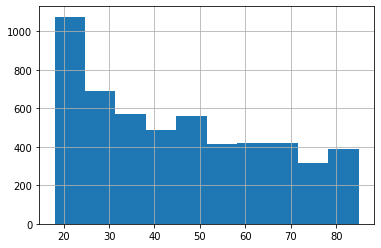

Total de crianças: 0


In [29]:
demo.Idade.hist() # Verificando coluna de idades para verificar Viés de Seleção
plt.show()

# Verificando totalidade de Crianças menores que 5 anos que responderam: 
kids = (demo.filter(like='Idade').sum(axis=1) <= 17).sum()
print(f'Total de crianças: {kids}')

In [83]:
pag = pd.read_csv('PAG_HEI.csv')
pag.fillna(0, inplace = True)
pag.rename(columns={'SEQN': 'ID'}, inplace=True)
pag.rename(columns={'PAG_MINW': 'Tempo_Semanal_AER'}, inplace=True)
pag.rename(columns={'ADHERENCE': 'Aderência'}, inplace=True) 
pag.rename(columns={'HEI2015C1_TOTALVEG': 'Total_Veg'}, inplace=True)
pag.rename(columns={'HEI2015C2_GREEN_AND_BEAN': 'Verduras V.E.L'}, inplace=True)
pag.rename(columns={'HEI2015C3_TOTALFRUIT': 'Total_Frutas'}, inplace=True)
pag.rename(columns={'HEI2015C4_WHOLEFRUIT': 'Frutas in Natura'}, inplace=True)
pag.rename(columns={'HEI2015C5_WHOLEGRAIN': 'Gãos Integrais'}, inplace=True)
pag.rename(columns={'HEI2015C6_TOTALDAIRY': 'Laticínios'}, inplace=True)
pag.rename(columns={'HEI2015C7_TOTPROT': 'Proteínas'}, inplace=True)
pag.rename(columns={'HEI2015C8_SEAPLANT_PROT': 'Plantas Marinhas/Proteínas Vegetais'}, inplace=True)
pag.rename(columns={'HEI2015C9_FATTYACID': 'Ácido Graxo'}, inplace=True)
pag.rename(columns={'HEI2015C10_SODIUM': 'Sódio'}, inplace=True)
pag.rename(columns={'HEI2015C11_REFINEDGRAIN': 'Grãos Refinados'}, inplace=True)
pag.rename(columns={'HEI2015C12_SFAT': 'Gordura Saturada'}, inplace=True)
pag.rename(columns={'HEI2015C13_ADDSUG': 'Açúcares Adicionados'}, inplace=True)
pag.rename(columns={'HEI2015_TOTAL_SCORE': 'Escore Total'}, inplace=True)

# ////////////////////////////////////////////////////////////////////////

pag['Aderência'] = pag['Aderência'].astype('category') # Categorizando a variável Aderência a Exercícios

def aderencia(x): # Função Lâmbda categorizando Aderência
    if x == 1:
        x = 'Baixo (< 150 min/semana)'
    if x == 2:
        x = 'Adequado (150-300 min/semana)'
    if x == 3:
        x = 'Acima (> 300 min/semana)'
    
    return x

pag['Aderência'] = pag['Aderência'].apply(lambda x: aderencia(x))

pag.head()

,ID,Tempo_Semanal_AER,Aderência,Total_Veg,Verduras V.E.L,Total_Frutas,Frutas in Natura,Gãos Integrais,Laticínios,Proteínas,Plantas Marinhas/Proteínas Vegetais,Ácido Graxo,Sódio,Grãos Refinados,Gordura Saturada,Açúcares Adicionados,Escore Total
0,31128,0.000000,0.0,3.083350,0.0,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
1,31129,285.450346,Adequado (150-300 min/semana),1.697761,0.0,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
2,31130,0.000000,Baixo (< 150 min/semana),0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,31131,264.711316,Adequado (150-300 min/semana),3.115103,0.0,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31132,1353.348730,Acima (> 300 min/semana),3.509081,0.0,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696


2. Em seguida, combine os dois bancos de dados fornecidos, utilizando a variável SEQN como chave única. O banco de dados final deve conter 5334 observações dos adultos respondentes do NHANES.

In [84]:
geral = pd.concat([demo, pag]) # Concatenando os dois Datasets
geral.fillna(0, inplace=True)
geral.set_index(['ID'], inplace = True) # Passando a variável 'SEQN' como Index ou Chave Única
ta = (geral.filter(like='Idade').sum(axis=1) >= 18).sum() # Verificando total de entrevistados adultos
print(f'Total de Adultos: {ta}')

Total de Adultos: 5334


3. Crie a variável phq9 - escore Patient Health Questionnaire-9 como a soma das variáveis DPQ010 a DPQ090

In [85]:
geral['PHQ9'] = geral['Questão 01'] + geral['Questão 02'] + geral['Questão 03'] + geral['Questão 04'] + geral['Questão 05'] + geral['Questão 06'] + geral['Questão 07'] + geral['Questão 08'] + geral['Questão 09']

4. Crie a variável phq_grp - grupo de sintomas de depressão que assume 0 (“sem sintomas”) se phq9 < 5, 1 (“sintomas leves”) se 5 <= phq9 < 10, 2 (“sintomas moderados”) se 10 <= phq9 < 15, 3 (“sintomas moderadamente severos”) se 15 <= phq9 < 19 e 4 (“sintomas severos”) se phq9 >= 20

In [86]:
# Criando Coluna 'PHQ_GRP' que categoriza os Sintomas de Depressão

# geral['PHQ_GRP'] = geral['Questão 01'] + geral['Questão 02'] + geral['Questão 03'] + geral['Questão 04'] + geral['Questão 05'] + geral['Questão 06'] + geral['Questão 07'] + geral['Questão 08'] + geral['Questão 09']
geral['PHQ_GRP'] = ''
geral['PHQ_GRP'] = geral['PHQ_GRP'].astype('category')

# ////////////////////////////////////////////////////////////////////////

#vamos criar os limites das faixas etárias para os nossos dados  
Sintomas = [0, 5, 9, 14, 19, 27]
#crie uma nova coluna :: selecione a coluna base
geral['PHQ_GRP'] = pd.cut(geral['PHQ9'], 
                             
                             #aplique os limites de cada categoria
                             Sintomas, 
                             #nomei cada categoria
                             labels=['Sintomas Leves', 'Sintomas Moderados','Sintomas Moderamente Severos',
                                     'Sintomas Severos', 'Emergência'])

pd.pivot_table(geral, values=['Raça/Etnia'],
                    index=['PHQ_GRP'], columns=['Faixas Etárias'],
                    aggfunc='count', margins=True)

Raça/Etnia                                       \
Faixas Etárias                        0 Adulto Idoso Jovem Adulto Meia Idade   
PHQ_GRP                                                                        
Sintomas Leves                      0.0    348   699         1011        311   
Sintomas Moderados                  0.0     80   146          200         69   
Sintomas Moderamente Severos        0.0     35    63           69         45   
Sintomas Severos                    0.0      7    28           29         17   
Emergência                          0.0      9     9            6          5   
All                                 NaN    479   945         1315        447   

                                    
Faixas Etárias                 All  
PHQ_GRP                             
Sintomas Leves                2369  
Sintomas Moderados             495  
Sintomas Moderamente Severos   212  
Sintomas Severos                81  
Emergência                      29  
All                           3186

# ```EDA: Análises Bivariadas```

## PHQ9 X Dados Demográficos

In [88]:
geral.info() # Verificando categorias
geral['Idade'] = geral['Idade'].astype('int')

# Convertendo variaveis categoricas

geral['Gênero'] = geral['Gênero'].astype('category')
geral['Raça/Etnia'] = geral['Raça/Etnia'].astype('category')
geral['Escolaridade'] = geral['Escolaridade'].astype('category')
geral['Renda Anual (U$)'] = geral['Renda Anual (U$)'].astype('category')
geral['PHQ_GRP'] = geral['PHQ_GRP'].astype('category')
geral['Aderência'] = geral['Aderência'].astype('category')
geral['Faixas Etárias'] = geral['Faixas Etárias'].astype('category')

# Codificando Variaveis Categóricas

geral['Gênero'] = geral['Gênero'].cat.codes
geral['Raça/Etnia'] = geral['Raça/Etnia'].cat.codes
geral['Escolaridade'] = geral['Escolaridade'].cat.codes
geral['Renda Anual (U$)'] = geral['Renda Anual (U$)'].cat.codes
geral['PHQ_GRP'] = geral['PHQ_GRP'].cat.codes
geral['Aderência'] = geral['Aderência'].cat.codes
geral['Faixas Etárias'] = geral['Faixas Etárias'].cat.codes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14758 entries, 31130 to 41474
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Questão 01                           14758 non-null  float64
 1   Questão 02                           14758 non-null  float64
 2   Questão 03                           14758 non-null  float64
 3   Questão 04                           14758 non-null  float64
 4   Questão 05                           14758 non-null  float64
 5   Questão 06                           14758 non-null  float64
 6   Questão 07                           14758 non-null  float64
 7   Questão 08                           14758 non-null  float64
 8   Questão 09                           14758 non-null  float64
 9   Gênero                               14758 non-null  int8   
 10  Idade                                14758 non-null  int32  
 11  Raça/Etnia              

In [89]:
geral.describe() # Descrever medidas do Dataset

,Questão 01,Questão 02,Questão 03,Questão 04,Questão 05,Questão 06,Questão 07,Questão 08,Questão 09,Gênero,Idade,Raça/Etnia,Escolaridade,Renda Anual (U$),Faixas Etárias,Tempo_Semanal_AER,Aderência,Total_Veg,Verduras V.E.L,Total_Frutas,Frutas in Natura,Gãos Integrais,Laticínios,Proteínas,Plantas Marinhas/Proteínas Vegetais,Ácido Graxo,Sódio,Grãos Refinados,Gordura Saturada,Açúcares Adicionados,Escore Total,PHQ9,PHQ_GRP
count,14758.000000,14758.000000,14758.000000,14758.000000,14758.000000,14758.000000,14758.000000,14758.000000,14758.000000,14758.000000,14758.000000,14758.000000,14758.000000,14758.000000,14758.000000,14758.000000,14758.000000,14758.000000,14758.000000,14758.000000,14758.000000,14758.000000,14758.000000,14758.000000,14758.000000,14758.000000,14758.000000,14758.000000,14758.000000,14758.000000,14758.000000,14758.000000,14758.000000
mean,0.100691,0.102588,0.180648,0.235059,0.105096,0.068776,0.075484,0.048448,0.016466,0.534964,16.296924,0.878303,1.164724,2.467543,0.909879,273.791061,0.932782,1.657953,0.896657,1.540825,1.393667,0.970263,2.348836,2.439846,1.346999,2.436054,2.889998,3.209731,3.349078,3.452272,27.932178,0.933257,0.302480
std,0.457473,0.432523,0.592492,0.622018,0.451181,0.370819,0.381513,0.344991,0.188617,0.771935,24.818166,1.367921,1.945948,3.860602,1.327513,692.760856,1.154798,1.803421,1.735027,1.970439,2.023543,1.615520,2.296550,2.258191,1.987989,3.170122,3.514356,3.792972,3.698763,3.827193,25.465800,2.660365,0.685167
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.164142,0.000000,0.061531,0.000000,0.000000,1.978452,2.702545,0.000000,0.337539,0.101781,0.411700,1.836104,1.661413,35.110674,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,30.000000,2.000000,2.000000,5.000000,2.000000,240.103926,2.000000,3.053602,0.337212,3.214309,3.101671,1.440837,5.000000,5.000000,2.709505,4.421262,5.812963,6.607857,6.616781,7.027622,49.762029,0.000000,0.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,2.000000,85.000000,5.000000,7.000000,15.000000,4.000000,13801.385681,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,89.529383,42.000000,5.000000


In [90]:
geral.corr() # Verifiando Correlações

,Questão 01,Questão 02,Questão 03,Questão 04,Questão 05,Questão 06,Questão 07,Questão 08,Questão 09,Gênero,Idade,Raça/Etnia,Escolaridade,Renda Anual (U$),Faixas Etárias,Tempo_Semanal_AER,Aderência,Total_Veg,Verduras V.E.L,Total_Frutas,Frutas in Natura,Gãos Integrais,Laticínios,Proteínas,Plantas Marinhas/Proteínas Vegetais,Ácido Graxo,Sódio,Grãos Refinados,Gordura Saturada,Açúcares Adicionados,Escore Total,PHQ9,PHQ_GRP
Questão 01,1.000000,0.510475,0.416903,0.456682,0.390634,0.394986,0.383151,0.336626,0.279212,0.258678,0.261855,0.260845,0.189406,0.219019,0.262322,-0.086994,-0.177799,-0.202362,-0.113756,-0.172126,-0.151601,-0.132200,-0.225129,-0.237825,-0.149145,-0.169148,-0.181012,-0.186270,-0.199308,-0.198554,-0.241436,0.694277,0.620799
Questão 02,0.510475,1.000000,0.450456,0.487414,0.430897,0.527231,0.471733,0.333630,0.336468,0.271169,0.271732,0.269869,0.213809,0.217811,0.293331,-0.093746,-0.191599,-0.218069,-0.122585,-0.185485,-0.163367,-0.142461,-0.242603,-0.256283,-0.160721,-0.182276,-0.195061,-0.200728,-0.214777,-0.213965,-0.260175,0.745980,0.666106
Questão 03,0.416903,0.450456,1.000000,0.604634,0.425064,0.382960,0.393546,0.307930,0.249281,0.349484,0.356019,0.340330,0.308615,0.316178,0.374366,-0.120508,-0.246294,-0.280320,-0.157580,-0.238435,-0.210003,-0.183129,-0.311858,-0.329444,-0.206601,-0.234310,-0.250745,-0.258029,-0.276089,-0.275045,-0.334447,0.748515,0.708698
Questão 04,0.456682,0.487414,0.604634,1.000000,0.483750,0.395269,0.422948,0.347026,0.251760,0.420455,0.436383,0.433739,0.386381,0.404411,0.456910,-0.149362,-0.305265,-0.347439,-0.195309,-0.295525,-0.260285,-0.226976,-0.386527,-0.408324,-0.256069,-0.290412,-0.310781,-0.319810,-0.342194,-0.340901,-0.414525,0.786883,0.798301
Questão 05,0.390634,0.430897,0.425064,0.483750,1.000000,0.369927,0.394436,0.309475,0.205014,0.252018,0.247199,0.267658,0.220087,0.231474,0.294589,-0.092066,-0.188164,-0.214160,-0.120388,-0.182160,-0.160439,-0.139907,-0.238254,-0.251689,-0.157840,-0.179009,-0.191564,-0.197130,-0.210927,-0.210130,-0.255512,0.677388,0.629750
Questão 06,0.394986,0.527231,0.382960,0.395269,0.369927,1.000000,0.404455,0.315610,0.323876,0.208564,0.212744,0.210476,0.161318,0.175256,0.227751,-0.073306,-0.149823,-0.170522,-0.095857,-0.145043,-0.127747,-0.111399,-0.189706,-0.200404,-0.125678,-0.142533,-0.152531,-0.156962,-0.167948,-0.167313,-0.203448,0.655361,0.592630
Questão 07,0.383151,0.471733,0.393546,0.422948,0.394436,0.404455,1.000000,0.361443,0.358465,0.228038,0.220705,0.229514,0.183330,0.196693,0.243300,-0.078201,-0.159828,-0.181909,-0.102258,-0.154728,-0.136278,-0.118838,-0.202374,-0.213786,-0.134070,-0.152051,-0.162716,-0.167443,-0.179162,-0.178485,-0.217033,0.668079,0.566960
Questão 08,0.336626,0.333630,0.307930,0.347026,0.309475,0.315610,0.361443,1.000000,0.374096,0.168323,0.167991,0.154221,0.119232,0.132983,0.165636,-0.055506,-0.113442,-0.129115,-0.072581,-0.109822,-0.096727,-0.084349,-0.143641,-0.151741,-0.095160,-0.107922,-0.115492,-0.118847,-0.127165,-0.126685,-0.154045,0.566356,0.448003
Questão 09,0.279212,0.336468,0.249281,0.251760,0.205014,0.323876,0.358465,0.374096,1.000000,0.100997,0.097379,0.104944,0.064798,0.073647,0.107685,-0.034504,-0.070518,-0.080261,-0.045118,-0.068268,-0.060128,-0.052433,-0.089290,-0.094326,-0.059154,-0.067087,-0.071793,-0.073878,-0.079049,-0.078750,-0.095758,0.467828,0.352627
Gênero,0.258678,0.271169,0.349484,0.420455,0.252018,0.208564,0.228038,0.168323,0.100997,1.000000,0.814116,0.784002,0.733359,0.786936,0.836282,-0.273911,-0.559819,-0.637160,-0.358173,-0.541956,-0.477331,-0.416246,-0.708843,-0.748816,-0.469598,-0.532579,-0.569934,-0.586492,-0.627541,-0.625170,-0.760187,0.398211,0.508379


In [91]:
# Verificar se o índice é único geral.index.is_unique
# geral.index.duplicated()
# geral.loc[~geral.index.duplicated(), :]
geral.drop_duplicates()

,Questão 01,Questão 02,Questão 03,Questão 04,Questão 05,Questão 06,Questão 07,Questão 08,Questão 09,Gênero,Idade,Raça/Etnia,Escolaridade,Renda Anual (U$),Faixas Etárias,Tempo_Semanal_AER,Aderência,Total_Veg,Verduras V.E.L,Total_Frutas,Frutas in Natura,Gãos Integrais,Laticínios,Proteínas,Plantas Marinhas/Proteínas Vegetais,Ácido Graxo,Sódio,Grãos Refinados,Gordura Saturada,Açúcares Adicionados,Escore Total,PHQ9,PHQ_GRP
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,85,2,3,3,2,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0
31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,44,4,3,11,1,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0
31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,70,2,7,11,2,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0
31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,73,2,2,12,2,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0
31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1,18,3,2,11,3,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,184.711316,2,2.555935,0.000000,2.613733,0.000000,0.000000,2.151846,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323,0.0,0
41471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,951.478060,1,2.674192,3.769401,2.198817,0.517369,0.463168,4.662005,5.000000,1.191796,6.145146,3.189620,3.766149,3.974279,7.758940,45.310883,0.0,0
41472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,27.713626,3,2.457422,2.930799,2.311917,0.000000,0.933303,5.000000,5.000000,5.000000,2.090534,8.409844,8.936854,3.063795,0.000000,46.134467,0.0,0


<AxesSubplot:xlabel='PHQ9', ylabel='Gênero'>

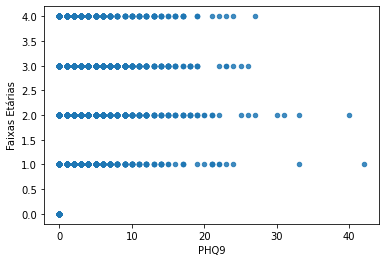

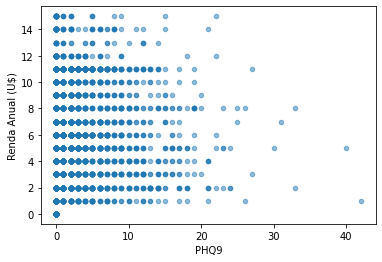

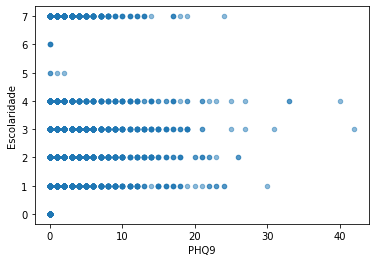

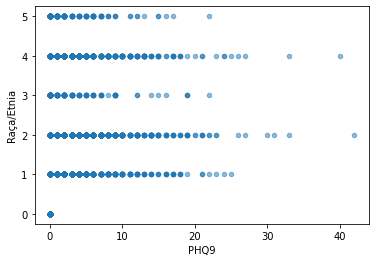

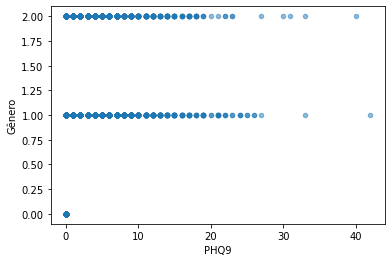

In [92]:
# Plotando gráficos de Dispersão para comparar PHQ9 X Dados Demográficos

geral.plot('PHQ9', 'Faixas Etárias', kind='scatter', alpha=0.85)
geral.plot('PHQ9', 'Renda Anual (U$)', kind='scatter', alpha=0.5)
geral.plot('PHQ9', 'Escolaridade', kind='scatter', alpha=0.5)
geral.plot('PHQ9', 'Raça/Etnia', kind='scatter', alpha=0.5)
geral.plot('PHQ9', 'Gênero', kind='scatter', alpha=0.5)

In [93]:
# Printando as Medianas das relações PHQ9 X Dados Demográficos

print('mediana da Idade com maior incidência em Depressão: ', geral[geral['PHQ9'] >= 1]['Faixas Etárias'].median())
print('mediana da Renda Anual (U$) com maior incidência em Depressão: ', geral[geral['PHQ9'] >= 1]['Renda Anual (U$)'].median())
print('mediana da Escolaridade com maior incidência em Depressão: ', geral[geral['PHQ9'] >= 1]['Escolaridade'].median())
print('mediana de Raça/Etnia com maior incidência em Depressão: ', geral[geral['PHQ9'] >= 1]['Raça/Etnia'].median())
print('mediana de Gênero com maior incidência em Depressão: ', geral[geral['PHQ9'] >= 1]['Gênero'].median())

mediana da Idade com maior incidência em Depressão:  3.0
mediana da Renda Anual (U$) com maior incidência em Depressão:  6.0
mediana da Escolaridade com maior incidência em Depressão:  3.0
mediana de Raça/Etnia com maior incidência em Depressão:  2.0
mediana de Gênero com maior incidência em Depressão:  1.0


**Com base nessas informações:** 

Concluo que o perfil com maior incidência de Sintomas de Depressão é: `Pessoas do Sexo Masculino adultos, entre 35-45 anos, Negros Não-hispânicos, que cursaram até o Ensino Médio e possuem uma Renda Anual entre $ 25000-34999` 

## Dados Demográficos X Hábitos Saudáveis

Text(0, 0.5, 'Aderência')

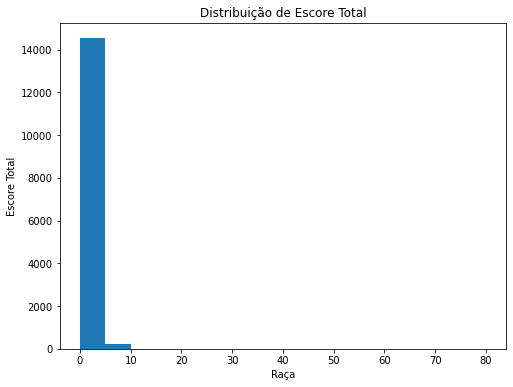

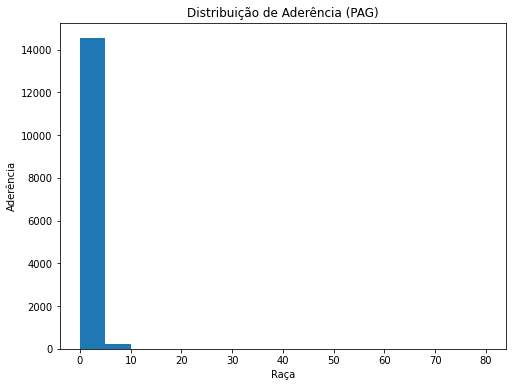

In [94]:
Raça = geral['Raça/Etnia']

plt.figure(figsize=(8, 6))
plt.hist(Raça, bins=range(0, 85, 5))
plt.title('Distribuição de Escore Total')
plt.xlabel('Raça')
plt.ylabel('Escore Total')

Raça = geral['Raça/Etnia']

plt.figure(figsize=(8, 6))
plt.hist(Raça, bins=range(0, 85, 5))
plt.title('Distribuição de Aderência (PAG)')
plt.xlabel('Raça')
plt.ylabel('Aderência')

Text(0, 0.5, 'Aderência')

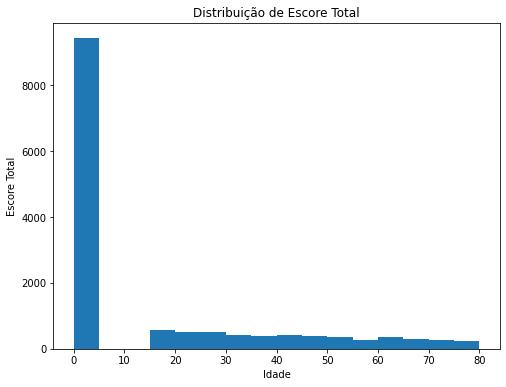

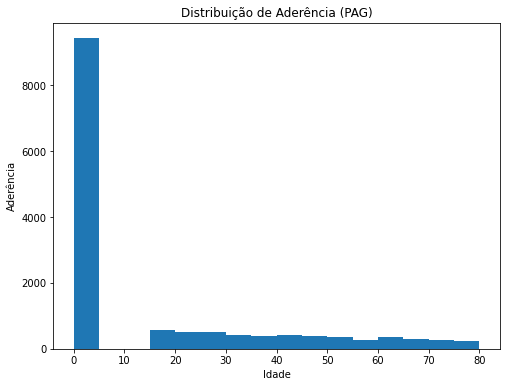

In [95]:
Idade = geral['Idade']

plt.figure(figsize=(8, 6))
plt.hist(Idade, bins=range(0, 85, 5))
plt.title('Distribuição de Escore Total')
plt.xlabel('Idade')
plt.ylabel('Escore Total')

Idade = geral['Idade']

plt.figure(figsize=(8, 6))
plt.hist(Idade, bins=range(0, 85, 5))
plt.title('Distribuição de Aderência (PAG)')
plt.xlabel('Idade')
plt.ylabel('Aderência')

Text(0, 0.5, 'Aderência')

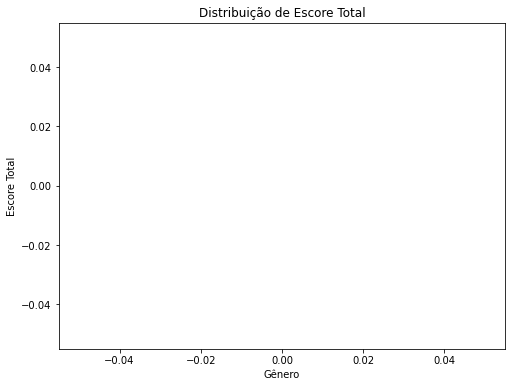

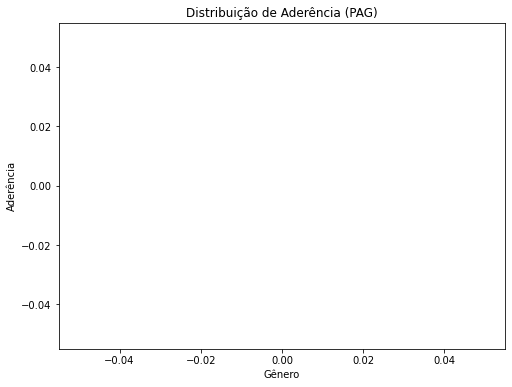

In [96]:
Gênero = geral['Gênero']

plt.figure(figsize=(8, 6))
plt.hist(Gênero, bins=range(1, 2))
plt.title('Distribuição de Escore Total')
plt.xlabel('Gênero')
plt.ylabel('Escore Total')

Gênero = geral['Gênero']

plt.figure(figsize=(8, 6))
plt.hist(Gênero, bins=range(1, 2))
plt.title('Distribuição de Aderência (PAG)')
plt.xlabel('Gênero')
plt.ylabel('Aderência')

Text(0, 0.5, 'Aderência')

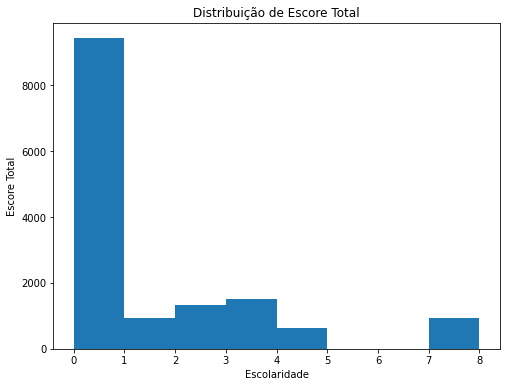

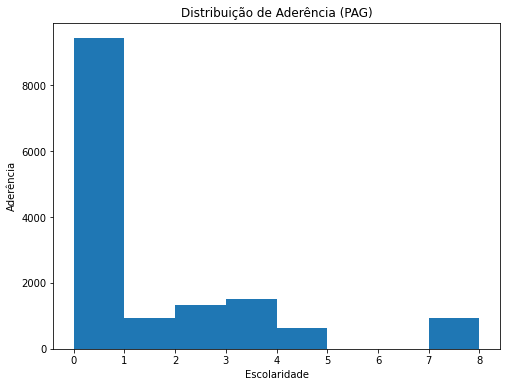

In [97]:
Escolaridade = geral['Escolaridade']

plt.figure(figsize=(8, 6))
plt.hist(Escolaridade, bins=range(0, 9))
plt.title('Distribuição de Escore Total')
plt.xlabel('Escolaridade')
plt.ylabel('Escore Total')

Escolaridade = geral['Escolaridade']

plt.figure(figsize=(8, 6))
plt.hist(Escolaridade, bins=range(0,9))
plt.title('Distribuição de Aderência (PAG)')
plt.xlabel('Escolaridade')
plt.ylabel('Aderência')

Text(0, 0.5, 'Aderência')

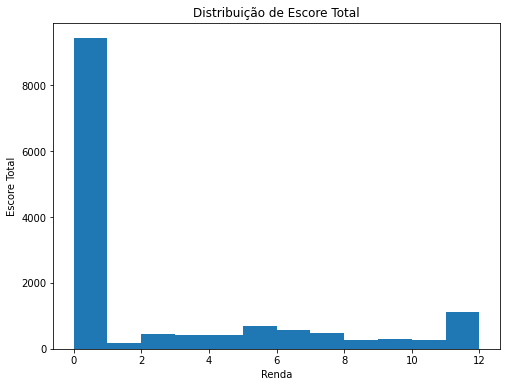

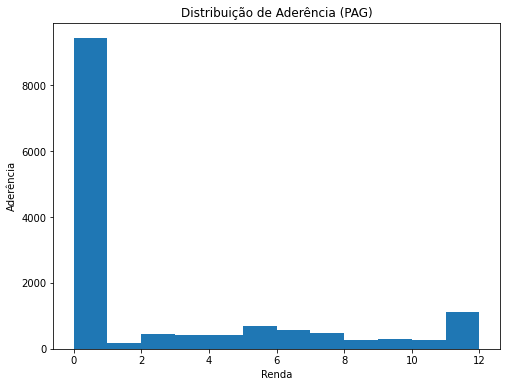

In [98]:
Renda = geral['Renda Anual (U$)']

plt.figure(figsize=(8, 6))
plt.hist(Renda, bins=range(0, 13))
plt.title('Distribuição de Escore Total')
plt.xlabel('Renda')
plt.ylabel('Escore Total')

Renda = geral['Renda Anual (U$)']

plt.figure(figsize=(8, 6))
plt.hist(Renda, bins=range(0, 13))
plt.title('Distribuição de Aderência (PAG)')
plt.xlabel('Renda')
plt.ylabel('Aderência')

**Concluo que o perfil que mais possui Aderência a Hábitos Saudáveis é:** 

`Jovens entre 15-20 anos que estão cursando o Ensino Superior e possui renda Familiar Anual maior que $ 20.000`

*Podemos perceber que há uma forte relação entre `Hábitos Saudáveis X Escolaridade`, bem como, `Hábitos Saudáveis X Renda Anual Familiar`*

## PH9 X Hábitos Saudáveis

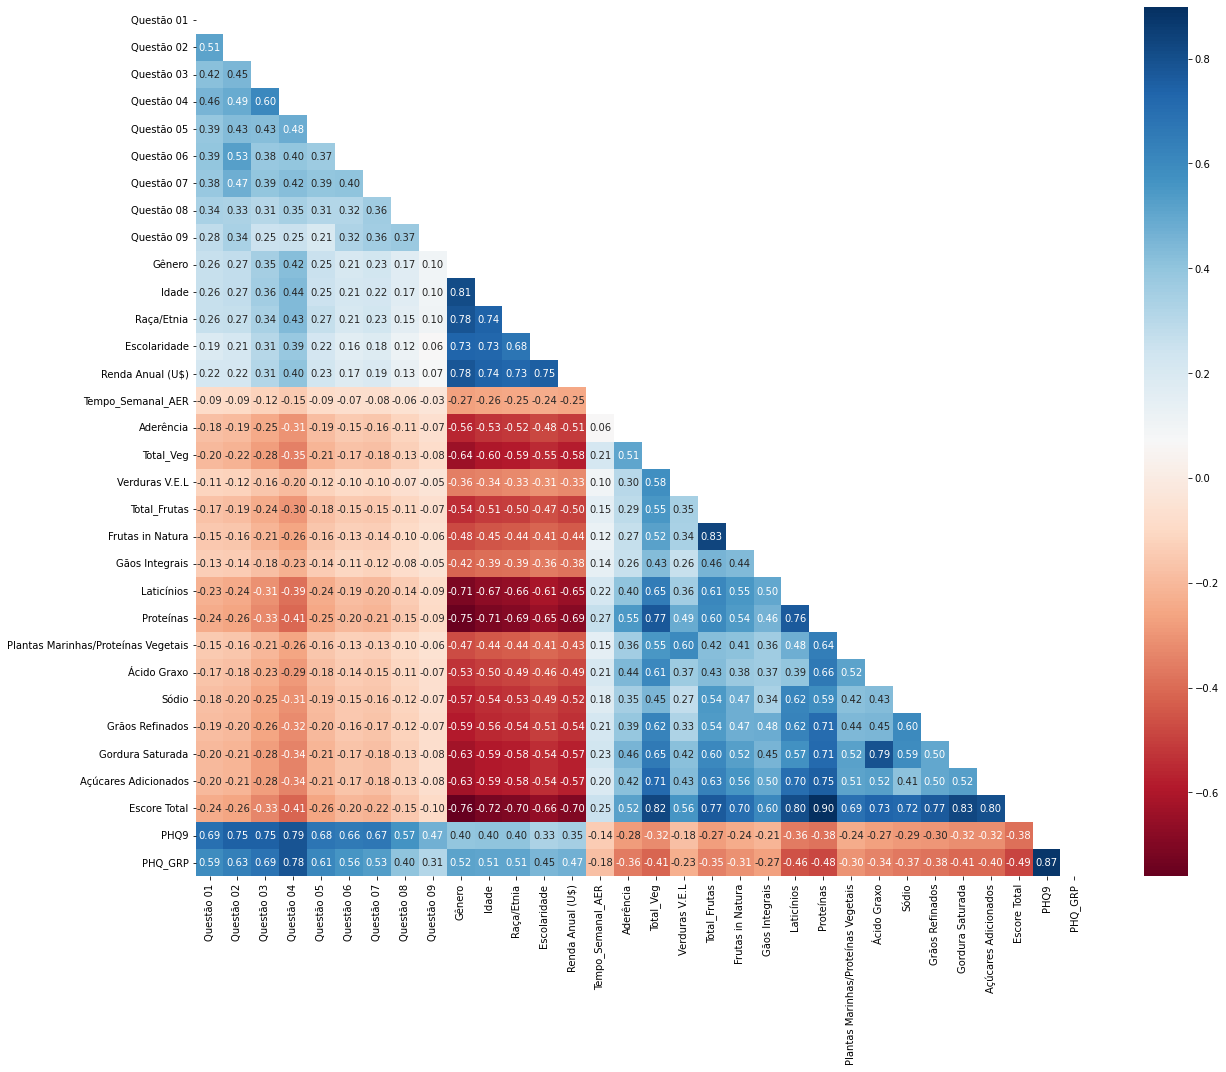

In [18]:
# Plotando a matriz de correlações usando um Heatmap 
sns.set_context(font_scale=1.9)
plt.figure(figsize=(20,16))
sns.heatmap(
    geral.corr(), 
    annot=True, 
    fmt='.2f', 
    cmap='RdBu', 
    mask=np.triu(np.ones_like(geral.corr())) 
           )
plt.show()

Text(0, 0.5, 'Aderência')

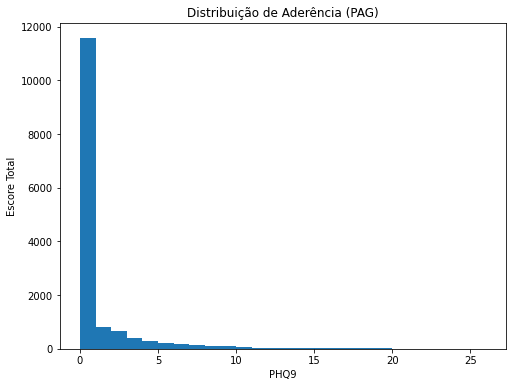

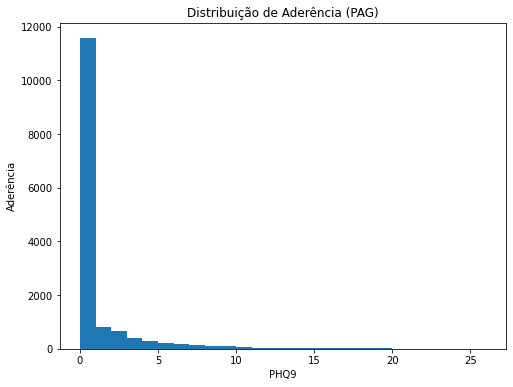

In [99]:
PHQ = geral['PHQ9']

plt.figure(figsize=(8, 6))
plt.hist(PHQ, bins=range(0, 27))
plt.title('Distribuição de Aderência (PAG)')
plt.xlabel('PHQ9')
plt.ylabel('Escore Total')

PHQ = geral['PHQ9']

plt.figure(figsize=(8, 6))
plt.hist(PHQ, bins=range(0, 27))
plt.title('Distribuição de Aderência (PAG)')
plt.xlabel('PHQ9')
plt.ylabel('Aderência')

Com base neste dados é possível observar que quanto **Maior o Nível de Sintomas de Depressão**,  **``Menor os Hábitos Saudáveis.``**

-----------

# `Testes de Hipóteses`

- Hipótese Nula ($H_0$): Não há relação entre Sintomas de Depressão X Renda Familiar Anual (U$)
- Hipótese Alternativa ($H_1$): Há relação entre Sintomas de Depressão X Renda Familiar Anual (U$) 

In [ ]:
geral.info()

Houve Viés de Não-resposta (muitos 7= não responderam 9= não sabe)

O Estudo conduzido pelo (NHANES) é Experimental, pois faz uma seleção de amostragem complexa.

In [47]:
label_quali = {"Renda Anual (U$)": {1: "0-4999", 2: "5000-9999", 3: "10000-14999", 4: "15000-19999", 5: "20000-24999", 6: "25000-34999", 7: "35000-44999", 8: "45000-54999", 9: "55000-64999", 10: "65000-74999", 11: ">= 75000", 12: "> 20000", 13: "< 20000", 77: "Se Recusou a responder", 99: "Não sabe"}
}

In [72]:
# ////////////////////////////////////////////////////////////////////////

#vamos criar os limites das faixas etárias para os nossos dados  
rendas = [0, 6, 11]
#crie uma nova coluna :: selecione a coluna base
geral['RENDA'] = pd.cut(geral['Renda Anual (U$)'], 
                             
                             #aplique os limites de cada categoria
                             rendas, 
                             #nomei cada categoria
                             labels=['<= 34999', '> 34999'])

pd.pivot_table(geral, values=['Raça/Etnia'],
                    index=['RENDA'], columns=['Gênero'],
                    aggfunc='count', margins=True)

Raça/Etnia                  
Gênero            0     1     2   All
RENDA                                
<= 34999        0.0  1428  1300  2728
> 34999         0.0  1230  1155  2385
All             NaN  2658  2455  5113

In [75]:
geral['RENDA'] = geral['RENDA'].astype('category')
geral['RENDA'] = geral['RENDA'].cat.codes
geral['RENDA']

ID
31130    1
31131    2
31132    2
31134    0
31139    2
        ..
41469    0
41471    0
41472    0
41473    0
41474    0
Name: RENDA, Length: 14758, dtype: int8

In [53]:
# Função para construir boxplot

def grafico_boxplot_grp(data, variable, label):
    
    if label == "": label = variable
    sns.boxplot(x="PHQ_GRP", y=variable, data=data)
    plt.ylabel(label)
    plt.show()

Gráfico do tipo Boxplot para comparar relação de Médias entre os grupos de Renda Anual Familiar X Sintomas de Depressão

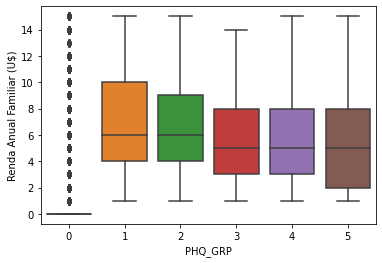

In [71]:
grafico_boxplot_grp(geral.replace(label_quali), 'Renda Anual (U$)', 'Renda Anual Familiar (U$)')

#### Teste de hipóteses:

In [78]:
from scipy.stats import f_oneway

db_aux = geral[["PHQ_GRP", "Renda Anual (U$)"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.PHQ_GRP == 0)]["Renda Anual (U$)"],
                   db_aux[(db_aux.PHQ_GRP == 1)]["Renda Anual (U$)"],
                   db_aux[(db_aux.PHQ_GRP == 2)]["Renda Anual (U$)"],
                   db_aux[(db_aux.PHQ_GRP == 3)]["Renda Anual (U$)"],
                   db_aux[(db_aux.PHQ_GRP == 4)]["Renda Anual (U$)"],
                   db_aux[(db_aux.PHQ_GRP == 5)]["Renda Anual (U$)"],)

print('stat=%.3f, p=%.3f' % (stat, p))

stat=1462.281, p=0.000


Através do Teste-F e o Boxplot podemos constatar que, de fato, há diferença entre a média de renda familiar anual (U$) em relação aos Sintomas de Depressão, rejeitando a `Hipótese Nula.`

In [80]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd # Teste Tukey para verificar aonde há diferença de Renda Anual Familiar X Sintomas de Depressão

tukey = pairwise_tukeyhsd(db_aux['Renda Anual (U$)'],
                  db_aux['PHQ_GRP'],
                  alpha = 0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   5.5585  0.001  5.3556  5.7615   True
     0      2   5.2064  0.001  4.7934  5.6194   True
     0      3   4.4217  0.001  3.7981  5.0454   True
     0      4    4.399  0.001  3.3957  5.4023   True
     0      5   4.2125  0.001  2.5395  5.8856   True
     1      2  -0.3521 0.2121 -0.7968  0.0926  False
     1      3  -1.1368  0.001 -1.7819 -0.4917   True
     1      4  -1.1595 0.0147 -2.1763 -0.1427   True
     1      5   -1.346 0.2014 -3.0272  0.3352  False
     2      3  -0.7847 0.0297 -1.5233 -0.0461   True
     2      4  -0.8074 0.2699 -1.8859  0.2711  False
     2      5  -0.9939 0.5574 -2.7131  0.7254  False
     3      4  -0.0227    0.9 -1.1981  1.1527  False
     3      5  -0.2092    0.9 -1.9908  1.5724  False
     4      5  -0.1865    0.9 -2.1337  1.7608  False
----------------------------------------------

## Através do Teste Tukey, podemos observar que há diferença na Renda Anual Familiar (U$) entre:

- `Sintomas Leves X Sintomas Moderamente Severos`
- `Sintomas Leves X Severos`
- `Sintomas Moderados X Sintomas Moderamente Severos`

## Enquanto não há diferença entre:

- `Sintomas Leves X Sintomas Moderados`
- `Sintomas Moderamente Severos X Sintomas Severos`
- `Sintomas Moderamente Severos X Emergência`
- `Sintomas Severos X Emergência`

Através destas associações junto ao Gráfico Boxplot acima, é possível concluir que, não só há muita diferença entre a Renda Anual Familiar e os Sintomas da Depressão como, há uma concentração muito maior de Sintomas Moderamente Severos a Emergenciais em indivíduos de Renda Anual Familiar inferior.